In [182]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ignore FutureWarning messages displayed mainly from Matplotlib
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None
# Increase the default figure size for the notebook.
plt.rcParams["figure.figsize"] = [10, 6]

# read the data from the downloaded Stack Overflow csv files
df_18 = pd.read_csv('./data/survey_results_public_18.csv', low_memory=False)
df_19 = pd.read_csv('./data/survey_results_public_19.csv')
df_20 = pd.read_csv('./data/survey_results_public_20.csv')

In [7]:
# Checking the dimensions of the three datasets we observe that the responses have reduced from year to year.
[df_18.shape, df_19.shape, df_20.shape]

[(98855, 129), (88883, 85), (64461, 61)]

In [3]:
# Also the 'Age' variable changed from categorical in 2018:
df_18.Age.head(10)

0    25 - 34 years old
1    35 - 44 years old
2                  NaN
3    35 - 44 years old
4    18 - 24 years old
5    18 - 24 years old
6    18 - 24 years old
7    25 - 34 years old
8    35 - 44 years old
9                  NaN
Name: Age, dtype: object

In [4]:
# to numerical (quantitative) in 2019 and 2020:
df_19.Age.head(10)

0    14.0
1    19.0
2    28.0
3    22.0
4    30.0
5    28.0
6    42.0
7    24.0
8    23.0
9     NaN
Name: Age, dtype: float64

In [8]:
# There are also differences in the columns. 'WorkWeekHrs' present in datasets for 2019 and 2020 is missing from 2018 dataset.

# Create a dictionary of years and responding datasets
dfs = { "2018" : df_18, "2019" : df_19, "2020" : df_20}

# Loop through the datasets to check existense of the column 'WorkWeekHrs'
for ds in dfs:
    if 'WorkWeekHrs' in dfs[ds].columns:
        print(f"It exists in {ds}")
    else:
        print(f"It is missing from {ds}")

It is missing from 2018
It exists in 2019
It exists in 2020


## Most active age groups

### 2018

For 2018 dataset, in which we have the most responses we will check the responders proportion per age group. This will give us an indication about the most active groups in the survey (and probably in engagement with Stack Overflow).

In [9]:
# First, select the columns we are interested in
age_df_18_all = df_18[['Age', 'Salary', 'ConvertedSalary']]

# Get the counts per age group
age_ranges_18 = age_df_18_all['Age'].value_counts().reset_index()

# Rename the 'index' to 'Age bins' and 'Age' to 'counts' and set the index to 'Age bins'
age_ranges_18.rename(columns={'index': 'Age bins', 'Age': 'count'}, inplace=True)
age_ranges_18.set_index('Age bins', inplace=True)

# Create a list of the available categories, but in the order we would prefer them to be in.
# This is to re-order the categories in a nicer way for presentation.
catg_order = ["Under 18 years old", "18 - 24 years old",
              "25 - 34 years old", "35 - 44 years old",
              "45 - 54 years old", "55 - 64 years old",
              "65 years or older"]

# Rearrange the index based on the above order
age_ranges_18 = age_ranges_18.reindex(catg_order)
age_ranges_18

,count
Age bins,
Under 18 years old,1638
18 - 24 years old,15249
25 - 34 years old,31759
35 - 44 years old,11477
45 - 54 years old,3313
55 - 64 years old,959
65 years or older,179


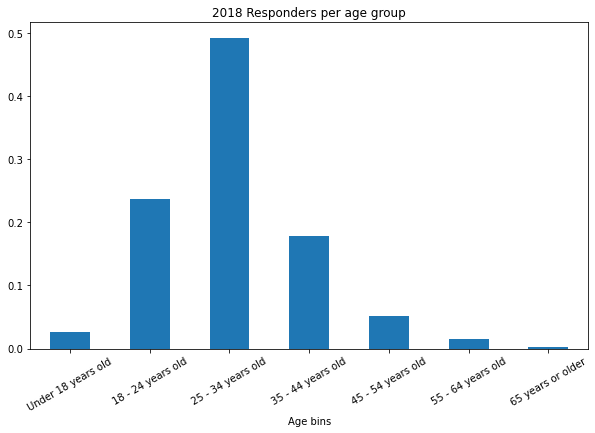

In [10]:
# Plot the above data; proportion (age_ranges/age_ranges['count'].sum()) against age groups
(age_ranges_18/age_ranges_18['count'].sum()).plot(kind='bar', legend=None)
plt.title('2018 Responders per age group')
# Rotate the x-axis tick values:
plt.xticks(rotation=30, horizontalalignment="center")
plt.show()

We observe that for 2018 Stack Overflow dataset, the three groups covering the range 18-44 years old, are the most active representing around 90% of the total responses.

### 2019

For 2019 we have to convert the quantitive variable "Age" to categorical.

In [11]:
# First, select the columns we are interested in
age_df_19_all = df_19[['Age', 'ConvertedComp', 'WorkWeekHrs']]
age_df_19_all = age_df_19_all.dropna(axis=0, subset=['Age'])

# Create categorical column 'age_ranges' by slicing 'Age' in bins. Name bins with the same category names (catg_order) as in 2018 dataset.
age_df_19_all.loc[:,"age_ranges"] = pd.cut(age_df_19_all.Age, bins=[0,18,25,35,45,55,65,200], labels=catg_order, right=False)

# Get the counts per age group
age_ranges_19_all = age_df_19_all['age_ranges'].value_counts().reset_index()

# Rename the 'index' to 'Age bins' and 'Age' to 'counts' and set the index to 'Age bins'
age_ranges_19_all.rename(columns={'index': 'Age bins', 'age_ranges': 'count'}, inplace=True)
age_ranges_19_all.set_index('Age bins', inplace=True)

# Rearrange the index based on human redable categories order defined in 'catg_order'
age_ranges_19_all = age_ranges_19_all.reindex(catg_order)
age_ranges_19_all

,count
Age bins,
Under 18 years old,2199
18 - 24 years old,19426
25 - 34 years old,37149
35 - 44 years old,14355
45 - 54 years old,4279
55 - 64 years old,1428
65 years or older,374


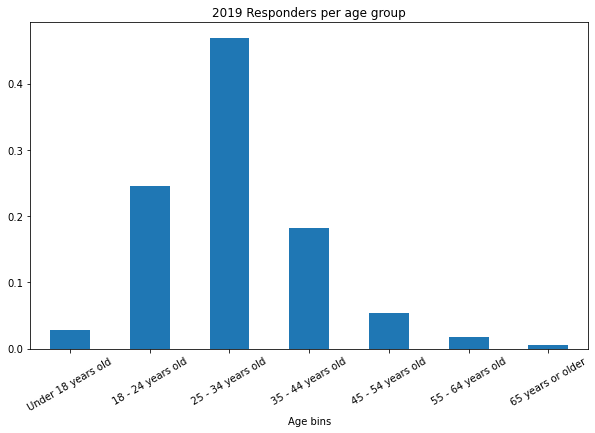

In [12]:
# Plot the above data; proportion (age_ranges/age_ranges['count'].sum()) against age groups
(age_ranges_19_all/age_ranges_19_all['count'].sum()).plot(kind='bar', legend=None)
plt.title('2019 Responders per age group')
# Rotate the x-axis tick values:
plt.xticks(rotation=30, horizontalalignment="center")
plt.show()

We observe a similar trend as that for 2018 Stack Overflow dataset. For 2019 the three groups covering the range 18-44 years old, are the most active representing around 90% of the total responses.

### 2020

For 2020, same as for 2019, quantitive variable "Age" has to be converted to categorical.

In [13]:
# First, select the columns we are interested in
age_df_20_all = df_20[['Age', 'ConvertedComp', 'WorkWeekHrs']]
age_df_20_all = age_df_20_all.dropna(axis=0, subset=['Age'])

# Create categorical column 'age_ranges' by slicing 'Age' in bins. Name bins with the same category names (catg_order) as in 2018 dataset.
age_df_20_all.loc[:,"age_ranges"] = pd.cut(age_df_20_all.Age, bins=[0,18,25,35,45,55,65,200], labels=catg_order, right=False)

# Get the counts per age group
age_ranges_20_all = age_df_20_all['age_ranges'].value_counts().reset_index()

# Rename the 'index' to 'Age bins' and 'Age' to 'counts' and set the index to 'Age bins'
age_ranges_20_all.rename(columns={'index': 'Age bins', 'age_ranges': 'count'}, inplace=True)
age_ranges_20_all.set_index('Age bins', inplace=True)

# Rearrange the index based on human redable categories order defined in 'catg_order'
age_ranges_20_all = age_ranges_20_all.reindex(catg_order)
age_ranges_20_all

,count
Age bins,
Under 18 years old,1200
18 - 24 years old,10672
25 - 34 years old,20865
35 - 44 years old,8673
45 - 54 years old,2807
55 - 64 years old,957
65 years or older,271


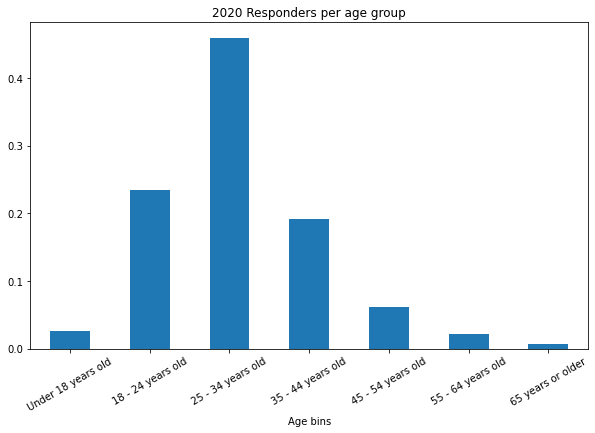

In [14]:
# Plot the above data; proportion (age_ranges/age_ranges['count'].sum()) against age groups
(age_ranges_20_all/age_ranges_20_all['count'].sum()).plot(kind='bar', legend=None)
plt.title('2020 Responders per age group')
# Rotate the x-axis tick values:
plt.xticks(rotation=30, horizontalalignment="center")
plt.show()

For 2020 we can observe a similar trend as that for 2018 and 2019 Stack Overflow datasets. The three groups covering the range 18-44 years old, are the most active representing around 90% of the total responses.

## Salary trends per age groups

Since for the three years we observe similar trends in age groups and to avoid cases of fake age values provided (e.g. 99 years old, 279 years old(!)) we will focus our study in the age groups covering ages 18 - 65 years old. These are usually considered worldwide the most productive ages for work.

### 2018

In [15]:
# The age groups we are interested in:
age_bins = ["18 - 24 years old", "25 - 34 years old",
            "35 - 44 years old", "45 - 54 years old",
            "55 - 64 years old"]

# Select the rows that are in the 'age_bins' we are interested in
bins_df_18 = age_df_18_all[age_df_18_all['Age'].isin(age_bins)]

# Create new df grouping by 'Age' (categorical for 2018 dataset) and getting the mean salary for each age group in a new column 'SalaryAv'
range_df_18 = bins_df_18.groupby("Age").ConvertedSalary.mean().round(2).to_frame(name="SalaryAv")
range_df_18

,SalaryAv
Age,
18 - 24 years old,57583.40
25 - 34 years old,92099.26
35 - 44 years old,128139.72
45 - 54 years old,153433.45
55 - 64 years old,191835.56


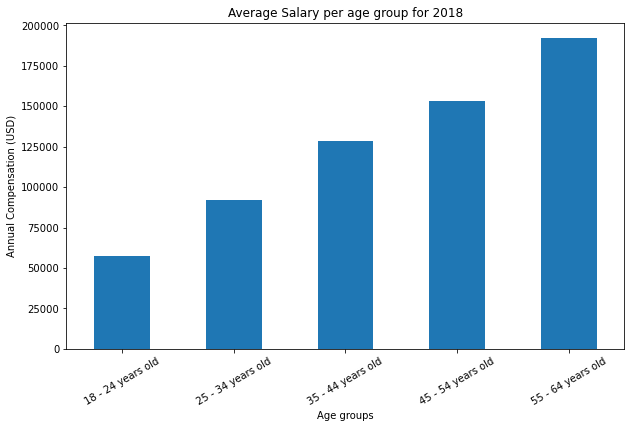

In [16]:
# Plot the 2018 salary data
range_df_18.plot(kind='bar', legend=None)
plt.title('Average Salary per age group for 2018')
plt.xlabel("Age groups")
plt.ylabel("Annual Compensation (USD)")
plt.xticks(rotation=30, horizontalalignment="center")
plt.show()

### 2019

In [17]:
# Select the rows that are in the 'age_bins' we are interested in. Use the categorical column 'age_ranges', created earlier.
bins_df_19 = age_df_19_all[age_df_19_all['age_ranges'].isin(age_bins)]

# Create new df, grouping by the created 'age_ranges' and getting the mean salary for each age group in a new column 'SalaryAv'
range_df_19 = bins_df_19.groupby("age_ranges", observed=True).ConvertedComp.mean().round(2).to_frame(name="SalaryAv")

# Also get the mean work hours per week for each age group in a new column 'WorkHoursAv'
range_df_19["WorkHoursAv"] = bins_df_19.groupby("age_ranges", observed=True).WorkWeekHrs.mean().round(2)
range_df_19

,SalaryAv,WorkHoursAv
age_ranges,,
18 - 24 years old,82819.98,40.38
25 - 34 years old,120768.28,42.32
35 - 44 years old,159775.97,42.88
45 - 54 years old,177390.81,42.55
55 - 64 years old,204777.96,43.34


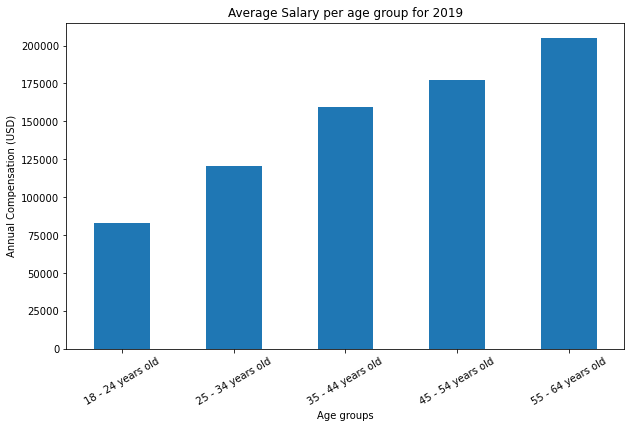

In [18]:
# Plot the 2019 salary data
range_df_19['SalaryAv'].plot(kind='bar', legend=None)
plt.title('Average Salary per age group for 2019')
plt.xlabel("Age groups")
plt.ylabel("Annual Compensation (USD)")
plt.xticks(rotation=30, horizontalalignment="center")
plt.show()

### 2020

In [19]:
# Select the rows that are in the 'age_bins' we are interested in. Use the categorical column 'age_ranges', created earlier.
bins_df_20 = age_df_20_all[age_df_20_all['age_ranges'].isin(age_bins)]

# Create new df, grouping by the created 'age_ranges' and getting the mean salary for each age group in a new column 'SalaryAv'
range_df_20 = bins_df_20.groupby("age_ranges", observed=True).ConvertedComp.mean().round(2).to_frame(name="SalaryAv")

# Also get the mean work hours per week for each age group in a new column 'WorkHoursAv'
range_df_20["WorkHoursAv"] = bins_df_20.groupby("age_ranges", observed=True).WorkWeekHrs.mean().round(2)
range_df_20

,SalaryAv,WorkHoursAv
age_ranges,,
18 - 24 years old,65538.41,39.07
25 - 34 years old,96439.27,40.79
35 - 44 years old,128926.49,41.51
45 - 54 years old,142311.87,42.07
55 - 64 years old,147984.43,42.10


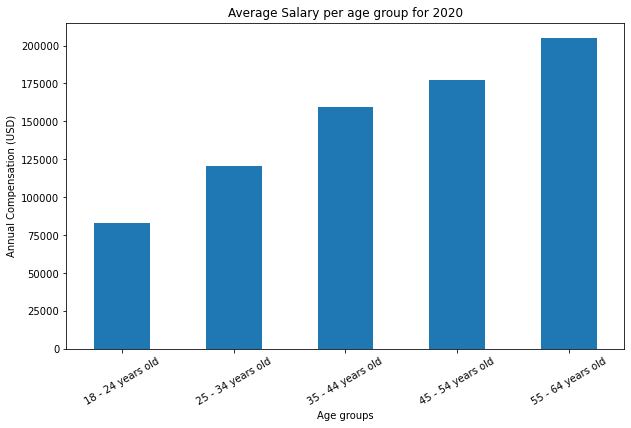

In [20]:
# Plot the 2020 salary data
range_df_19['SalaryAv'].plot(kind='bar', legend=None)
plt.title('Average Salary per age group for 2020')
plt.xlabel("Age groups")
plt.ylabel("Annual Compensation (USD)")
plt.xticks(rotation=30, horizontalalignment="center")
plt.show()

We observe that for the three years of Stack Overflow data we considered the trend is the same. There is linear-like increase in the average salary with the younger age groups having less salary on average than the older groups. The group 18-24 years old has the lowest salary on average while the 55-64 years old group has the highest average salary.

In [220]:
# Create a function to plot grouped bar charts and combine with line charts if needed.
def plot_groupbarchart(figsize, w_clustr, list_ds, x_labels, chart_title=None, ylabel=None, xlabel=None, legends=None,
                        transp_val=1.0, secnd_ds=None, ylabel_2=None, legends_2=None):
    '''
    INPUT:
    figsize: A tuple representing the resulting figure size, e.g. (20,10) or (10, 6) etc.
    w_clustr: The total width of each cluster of plotted bars per x-axis tick.
    list_ds: A list of pandas series, of equal lengths, with numerical values to be plotted as y values.
    x_labels: A list of labels to be used for x-axis ticks' labels. Should be strings.
    chart_title: The chart title as a string.
    ylabel: y-axis label as a string.
    xlabel: x-axis label as a string.
    legends: Bar legends with the same order as the list of data provided.
    transp_val: The a (alpha) value to be used for making bars transparent. Default is 1.0 (no transparency)
    
    OUTPUT:
    A plot of a grouped bar chart at each x-axis tick and a tuple with the figure and one axis subplot.
    '''

    # set the figure size.
    plt.rcParams['figure.figsize']=figsize
    # set the plotting style to use.
    plt.style.use('fivethirtyeight')
    # To cycle colors per subplot, if a second subplot is used, the built-in property cycler will be used to get a new color from it for each subplot.
    colors = plt.rcParams["axes.prop_cycle"]()

    # Set up the subplots. Create figure and axis objects.
    fig, ax1 = plt.subplots()

    # Determine bar widths and number of provided data series for plotting.
    n = len(list_ds)
    width_bar = w_clustr/float(n)
    
    # the x-label locations
    x = np.arange(len(x_labels))
    
    # Iterate through the list of the given data series and plot the bars at the calculated x-tick locations.
    for i, ds in enumerate(list_ds):
        # Get next color from the cycler
        c = next(colors)["color"]
        # calculate the location on x-axis where bars will be plotted. We want the cluster centered around the x-axis ticks.
        x_loc = x + i*width_bar - (n - 1)*width_bar/2
        ax1.bar(x_loc, ds, width=width_bar, alpha=transp_val, color=c)

    ax1.set_xticks(x)
    # Set the x-axis labels to be the same as the age bins we used before.
    ax1.set_xticklabels(age_bins)

    # If a chart title is provided, add it in the chart, else create a generic one.
    if chart_title:
        ax1.set_title(chart_title)
    else:
        ax1.set_title(f'Grouped bar chart for {n} data series.')
    # If y-label is provided, add it in the chart.
    if ylabel:
        ax1.set_ylabel(ylabel, labelpad=20)
    # If x-label is provided, add it in the chart.
    if xlabel:
        ax1.set_xlabel(xlabel, labelpad=20)
    # If legends are provided, add them in the chart.
    if legends:
        ax1.legend(legends, loc="upper left")

    if secnd_ds:
        # set up the 2nd axis, if a second data series list is provided.
        ax2 = ax1.twinx()
        for k, ds2 in enumerate(secnd_ds):
            # Get next color from the cycler
            c = next(colors)["color"]
            #plot the average work-hours per week
            ax2.plot(x, ds2, color=c)
        # turn off grid for second axis
        ax2.grid(b=False)

    # If y-label and/or legends are provided for 2nd axis, add it in the chart.
    if ylabel_2:
        ax2.set_ylabel(ylabel_2, labelpad=20)
    if legends_2:
        # use different location for this legend so it does not overlap with the previous.
        ax2.legend(legends_2, loc="upper right")


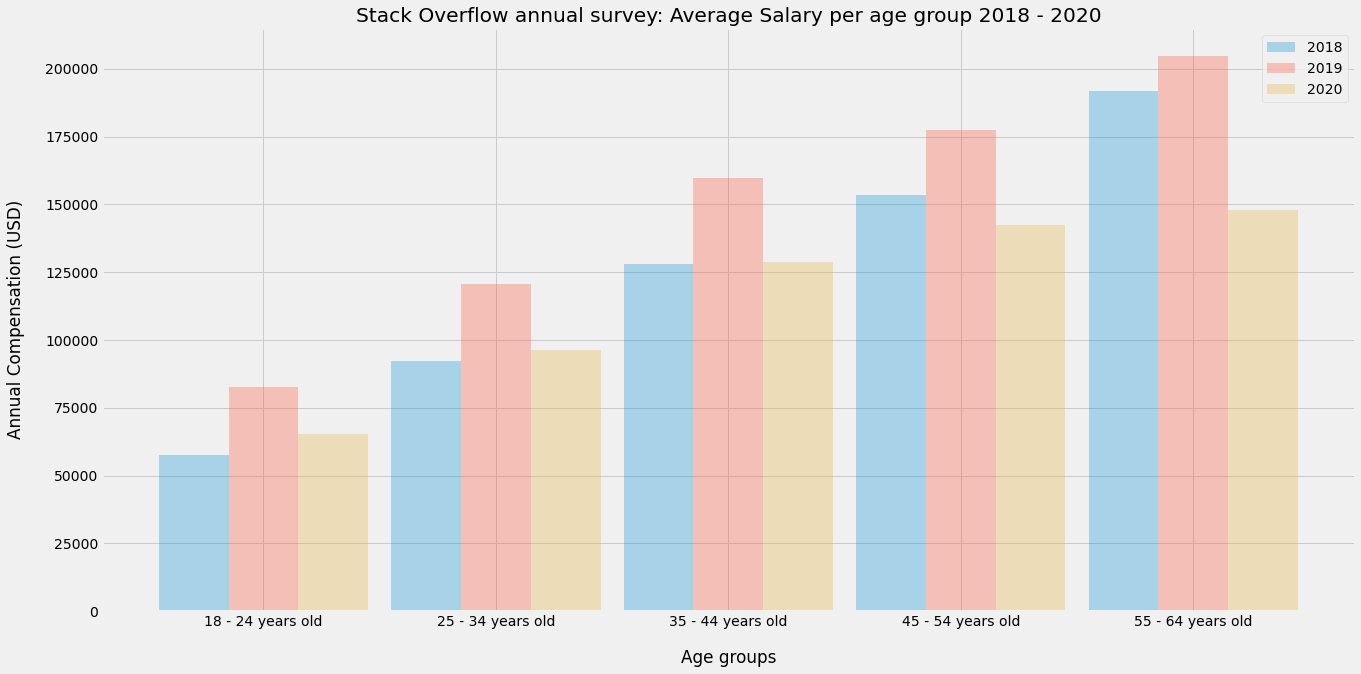

In [203]:
# Use the function created to plot a grouped bar chart of average responders saraly per age group, for three consecutive years 2018-2020.
salary_series = [range_df_18.SalaryAv, range_df_19.SalaryAv, range_df_20.SalaryAv]
legends = ('2018', '2019', '2020')
chart_title = 'Stack Overflow annual survey: Average Salary per age group 2018 - 2020'
y_title = 'Annual Compensation (USD)'
x_title = 'Age groups'

plot_groupbarchart((20,10), 0.9, salary_series, age_bins, chart_title, y_title, x_title, legends, 0.3)

In the group bar chart (2018, 2019, 2020) we can observe the same trend, in general, for the years 2018-2020, with the younger age groups having less salary on average than the older groups. We can observe that in 2019 the average pay was much higher for all age groups in comparison to 2018 and 2020. Most interestingly the average salary has increased from 2018 to 2019 for all age groups, but shows a significant decrease from 2019 to 2020 again for all age groups.

## Average work hours per week

For 2019 and 2020 there is available data for work-hours per week. This data has been considered only for the individuals that have provided age and have been categorized in an age group. The average work-hours per week for each of these age groups have already been calculated earlier. For 2018 there is no data for weekly work hours, therefore this section will provide a comparison between 2019 and 2020 only.

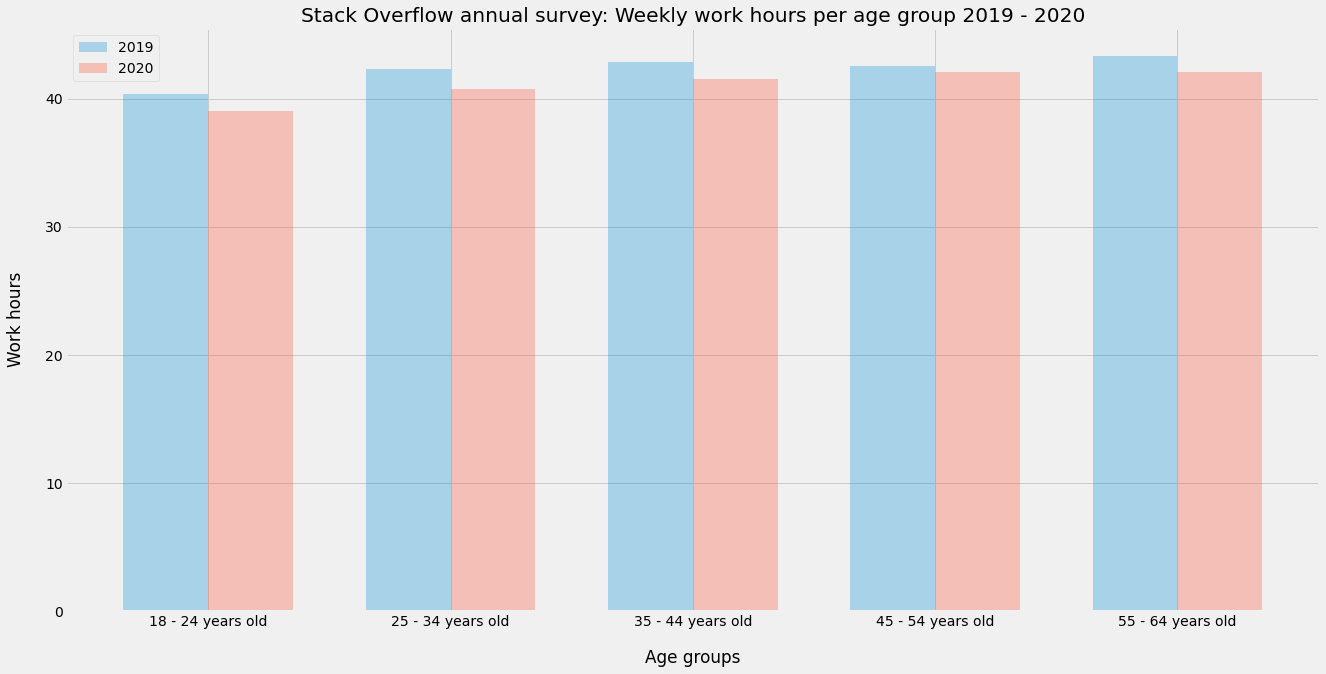

In [222]:
# Use the function created to plot a grouped bar chart of average work hours per age group, for two consecutive years 2019-2020.
workh_series = [range_df_19.WorkHoursAv, range_df_20.WorkHoursAv]
wrk_legends = ('2019', '2020')
wrk_chart_title = 'Stack Overflow annual survey: Weekly work hours per age group 2019 - 2020'
wrk_y_title = 'Work hours'
wrk_x_title = 'Age groups'

plot_groupbarchart((20,10), 0.7, workh_series, age_bins, wrk_chart_title, wrk_y_title, wrk_x_title, wrk_legends, 0.3)

We can observe that there is a similar trend between 2019 and 2020, with the older age groups having more work hours on average than the younger ones. Also, it looks that the age groups above 25 years old work for more than 40 hours per week. It is also clear that the average work hours per age group were less in 2020 than in 2019.

## Relation between salary and work hours per age group

Those previous charts seem to indicated that there might be a relation between salary and work hours. Trying to identify a trend between these variables per age group we will add line plots in the chart with the salary per group.

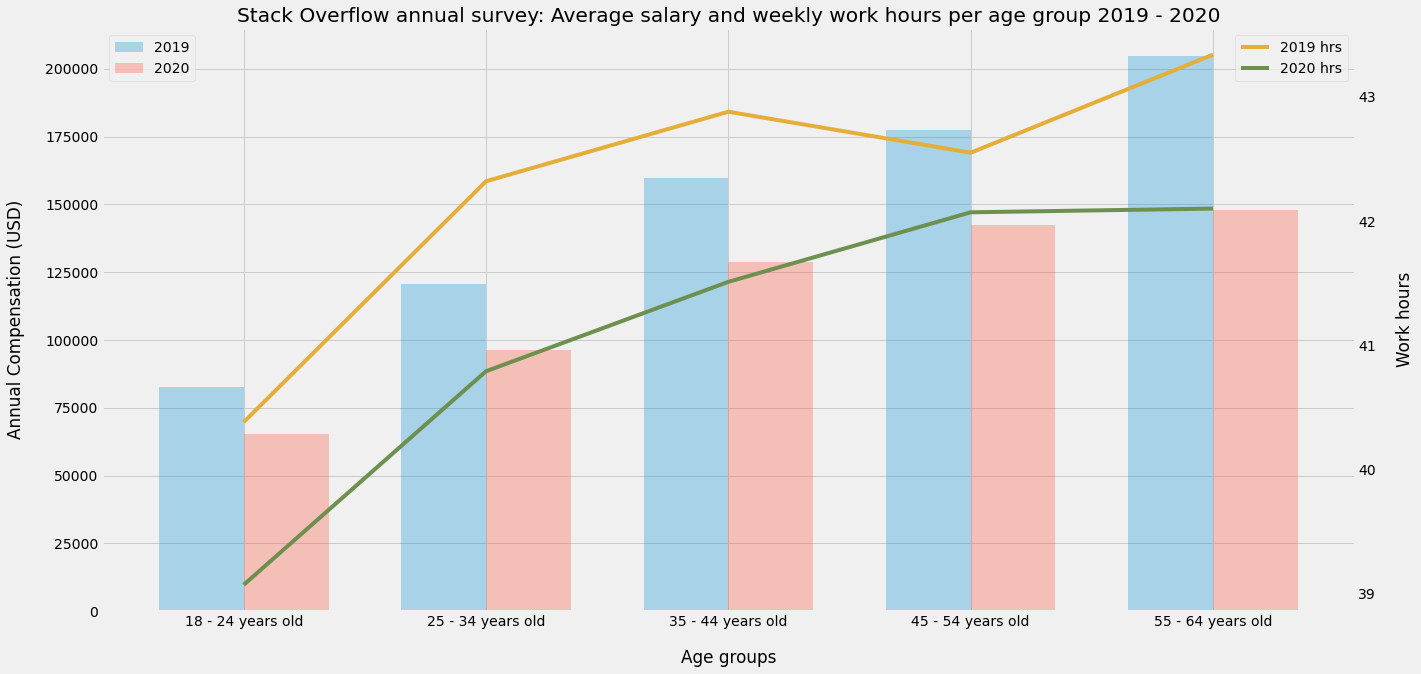

In [223]:
# Use the function created to plot a combined grouped bar chart of average responders saraly with a line chart of average weekly hours per age group, for two consecutive years 2019-2020 
combined_title = 'Stack Overflow annual survey: Average salary and weekly work hours per age group 2019 - 2020'
legends_2 = ('2019 hrs', '2020 hrs')
plot_groupbarchart((20,10), 0.7, salary_series[-2:], age_bins, combined_title, y_title, x_title, legends[-2:], 0.3, workh_series, wrk_y_title, legends_2)

In this chart we can observe that in general a larger salary means more work hours and that older age groups are in general paid more but also work more hours. This trend seems to have an exception for the age group 45-54 years old in 2019, but apart from this appears true for the rest of the age groups in 2019 and all age groups in 2020. This discrepancy might be coincidental or might have to do with the data.